#**Installs/imports**

In [64]:
!pip install scipy -q

In [65]:
import numpy as np
from scipy import stats
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

##**Load in the data**

**Example of how to complete the exercise:** <br>

Since I could sense that some of you had issues completely getting grips with some of the functions I used during the workshop to calculate the variables, I'll add in a more detailed description for each step, as well as how to verify/check the different variables we calculate.

**Application 12.20 from the book page 335:** <br>
A courier service advertises that the average delivery time is less than 6 minutes. A random sample of times for 12 deliveries to a adress across town was recorded. Is this sufficient evidence to support the couriers advertisement, at the %5 level of confidence? <br>
The data is available here: <br>
https://github.com/saoter/AQM2023/raw/main/Workshop%203/data/Xr12-20.xlsx

1. Using the pandas module, I read the excel file straight from the Github repository that you guys have a link for on moodle in a data structure, that is commonly called a dataframe. This is just easier and quicker than downloading a reuploading the data back into Google colab, or locating the directory/folder that you're working from locally.
2. I assign the dataframe to the variable: times. This means that whenever I want to work with this dataframe, I can merely refer to this variable, as it now contains the dataframe with our data.

In [66]:
file_path = 'https://github.com/saoter/AQM2023/raw/main/Workshop%203/data/Xr12-20.xlsx'
times = pd.read_excel(file_path)

We can get the dataframe as an output by simply writing out the name of the variable we assigned it to, and running the cell.

In [67]:
# Your data as a dataframe
times

,Times
0,3.03
1,6.33
2,6.50
3,5.22
4,3.56
5,6.76
6,7.98
7,4.82
8,7.96
9,4.54


##**Calculating the mean and standard error of the data**

Next we want to calculate the different variables from this data that we will be using to calculate our confidence interval. From the equation I showed you, you may remember we need the mean value, the standard error and the degrees of freedom. <br>
1. We calculate the mean value of the population using np.mean() and assign this value to the variable: mean
2. Similarly we calculate the standard error of the mean using stats.sem() and assign this value to the variable: sem

In [68]:
# Calculate the mean
mean = np.mean(times)
# Calcute the standard error of the mean (SEM)
sem = stats.sem(times)

/usr/local/lib/python3.10/dist-packages/numpy/core/fromnumeric.py:3430: FutureWarning: In a future version, DataFrame.mean(axis=None) will return a scalar mean over the entire DataFrame. To retain the old behavior, use 'frame.mean(axis=0)' or just 'frame.mean()'
  return mean(axis=axis, dtype=dtype, out=out, **kwargs)


Once again we can check our values in a few ways:
1. We can simply write the variable name we saved the value to; mean and sem

In [69]:
mean

Times    5.6875
dtype: float64

In [70]:
sem

array([0.45621321])

2. Alternatively we can create a 'prettier' output using what's known as a formatted string. A string is simply a way we represent text in Python, and a formatted string is a method for performing calculations or calling variables we've created inside of our text. <br>
A string is created like this: "This is a string" or 'This is a string', where the text is surrounded by either single or double quotation marks. A formatted string is created by just putting an f infront of it, and then surrounding whichever function you which to use in curly brackets like these: { } <br>
<br>
In my example below, you may also notice that I call mean[0] specifically. This is because I am calling the first element of mean to get just the number rather than the output we saw above. In most practical cases this doesn't matter, but it's good practice for understanding how indexing works in Python.

In [71]:
#Print mean and SEM (standard error)
print(f"Mean value of population: {mean[0]} \n \n Standard error of population: {sem[0]}")

Mean value of population: 5.6875 
 
 Standard error of population: 0.456213209392541


##**Calculating degrees of freedom + setting confidence level**

Next we need to calculate the degrees of freedom. From the slides I showed you, you may remember that degrees of freedom was calculated as:

$df = n - 1$ <br>

By using the built in function called len() we can find the length of the index, which will provide us with the number of observations in our population. We take this value minus 1 and we got our degrees of freedom. Once again we assign this to it's own variable to easily assemble the final function call for the confidence interval.

In [72]:
len(times)

12

In [73]:
# Calculate the degrees of freedom
degrees_of_freedom = len(times) - 1

In [74]:
degrees_of_freedom

11

We set the confidence interval as decimal number. In this case 0.95

In [75]:
# Set the confidence level (95%)
confidence_level = 0.95

##**Calculating the confidence interval**

Finally we use the stats.t.interval() function, filling in the parameters of the function with the variables we have already defined. <br>
Note: It is possible to simply fill the numbers straight into the function if you know them beforehand, instead of defining each as its own variable

In [76]:
# Calculate the confidence interval
conf_interval = stats.t.interval(
    confidence_level,
    df=degrees_of_freedom,
    loc=mean,
    scale=sem
    )

An example of just filling in the numbers approach, using the same numbers we calculated earlier:

In [77]:
# Calculate the confidence interval
conf_interval_manual = stats.t.interval(
    0.95,
    df=11,
    loc=5.6875,
    scale=0.456213209392541
    )

As you can see, sometimes calling functions in different ways can lead to different outputs, despite the actual function being the same. In this case, conf_interval lead to what's known as a tuple of arrays, both of which are a type of list. So basically we get a sort of list of lists. So in order to get out a specific value, we need to call the index of each. conf_interval[0][0] being the first element of the first array. <br> <br>

In the manual method however, we simply get a tuple, which again is just a type of list in python, which means we can simply call [0] once to get the first value, and [1] to get the second. <br><br>

Again, all this indexing is in this case just to produce nicer print statement, and if you feel more comfortable just reading the conf_interval outputs, that's more than fine as well, as in most practical applications, we don't bother with print statements unless absolutely necessary.

In [78]:
conf_interval

(array([4.6833815]), array([6.6916185]))

In [79]:
conf_interval_manual

(4.683381496293203, 6.691618503706797)

In [80]:
print(f"95% Confidence Interval is between {[conf_interval[0][0], conf_interval[1][0]]}")
print(f"95% Confidence Interval is between {[conf_interval_manual[0], conf_interval_manual[1]]} (manual version)")

95% Confidence Interval is between [4.683381496293203, 6.691618503706797]
95% Confidence Interval is between [4.683381496293203, 6.691618503706797] (manual version)


**You can visualize the data to show the rough distribution using a histogram plot** <br>
(Admittedly, this one is not very pretty due to the distribution of the data, and the way Seaborn creates bins)

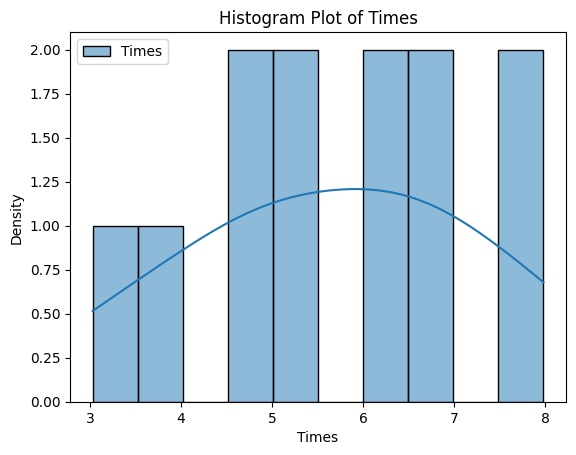

In [81]:
# Create a histogram plot with Seaborn
sns.histplot(times, bins=10, kde=True, color='g')

# Add labels and title
plt.xlabel('Times')
plt.ylabel('Density')
plt.title('Histogram Plot of Times')

# Show the plot
plt.show()

#**Your turn to do some work!**

##**Start with assignment 12.21 in the book on page 336** <br>
How much money do winners go home with from the television quiz show *Jeopardy*? To determine an answer: a random sample of winners was drawn, the recorded amount of money each won is listed in the data below. Estimate with 95% confidence the mean of winnings for all the shows players.

Link to data: <br>
https://github.com/saoter/AQM2023/raw/main/Workshop%203/data/Xr12-21.xlsx

In [82]:
# Load in your data
file_path = 'https://github.com/saoter/AQM2023/raw/main/Workshop%203/data/Xr12-21.xlsx'
winnings = pd.read_excel(file_path)

In [83]:
winnings

,Winnings
0,26650
1,6060
2,52820
3,8490
4,13660
5,25840
6,49840
7,23790
8,51480
9,18960


In [84]:
# Calculate the mean
mean_winnings = np.mean(winnings)
# Calcute the standard error of the mean (SEM)
sem_winnings = stats.sem(winnings)

/usr/local/lib/python3.10/dist-packages/numpy/core/fromnumeric.py:3430: FutureWarning: In a future version, DataFrame.mean(axis=None) will return a scalar mean over the entire DataFrame. To retain the old behavior, use 'frame.mean(axis=0)' or just 'frame.mean()'
  return mean(axis=axis, dtype=dtype, out=out, **kwargs)


In [85]:
# Calculate the degrees of freedom
degrees_of_freedom_winnings = len(winnings) - 1

In [86]:
print(f"Degrees of freedom for the data: {degrees_of_freedom_winnings}")

Degrees of freedom for the data: 14


In [87]:
# Set the confidence level
confidence_level_winnings = 0.95

In [88]:
# Calculate the confidence interval
conf_interval_winnings = stats.t.interval(
    confidence_level_winnings,
    df=degrees_of_freedom_winnings,
    loc=mean_winnings,
    scale=sem_winnings
    )

In [89]:
# Print the results
print(f"95% Confidence Interval is between {[conf_interval_winnings[0][0], conf_interval_winnings[1][0]]}")

95% Confidence Interval is between [14422.54917558186, 33678.78415775148]


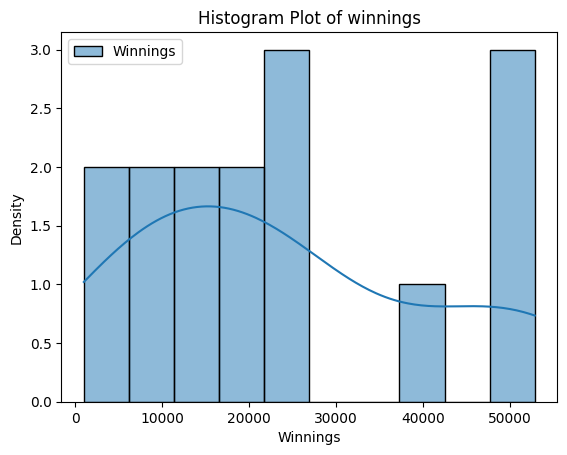

In [90]:
# Optional: Visualize the distribution
# Create a histogram plot with Seaborn
sns.histplot(winnings, bins=10, kde=True, color='g')

# Add labels and title
plt.xlabel('Winnings')
plt.ylabel('Density')
plt.title('Histogram Plot of winnings')

# Show the plot
plt.show()

##**Assignment 12.23 in the book on page 336** <br>
A parking control officer is conducting an analysis of time left on parking meters. A quick survey of 15 cars that have just left their metered parking spaces produced the following times (in minutes). Estimate with 95% confidence  the mean amount of time left for all the city's meters. <br>

Link to data: <br>
https://github.com/saoter/AQM2023/raw/main/Workshop%203/data/Xr12-23.xlsx

In [91]:
# Load in your data
file_path = 'https://github.com/saoter/AQM2023/raw/main/Workshop%203/data/Xr12-23.xlsx'
parking = pd.read_excel(file_path)

In [92]:
parking

,Time
0,22
1,15
2,1
3,14
4,0
5,9
6,17
7,31
8,18
9,26


In [93]:
# Calculate the mean
mean_parking = np.mean(parking)
# Calcute the standard error of the mean (SEM)
sem_parking = stats.sem(parking)

/usr/local/lib/python3.10/dist-packages/numpy/core/fromnumeric.py:3430: FutureWarning: In a future version, DataFrame.mean(axis=None) will return a scalar mean over the entire DataFrame. To retain the old behavior, use 'frame.mean(axis=0)' or just 'frame.mean()'
  return mean(axis=axis, dtype=dtype, out=out, **kwargs)


In [94]:
# Calculate the degrees of freedom
degrees_of_freedom_parking = len(parking) - 1

In [95]:
# Set the confidence level
confidence_level_parking = 0.95

In [96]:
# Calculate the confidence interval
conf_interval_parking = stats.t.interval(
    confidence_level_parking,
    df=degrees_of_freedom_parking,
    loc=mean_parking,
    scale=sem_parking
    )

In [97]:
# Print the results
print(f"95% Confidence Interval is between {[conf_interval_parking[0][0], conf_interval_parking[1][0]]}")

95% Confidence Interval is between [12.73222245127726, 23.534444215389406]


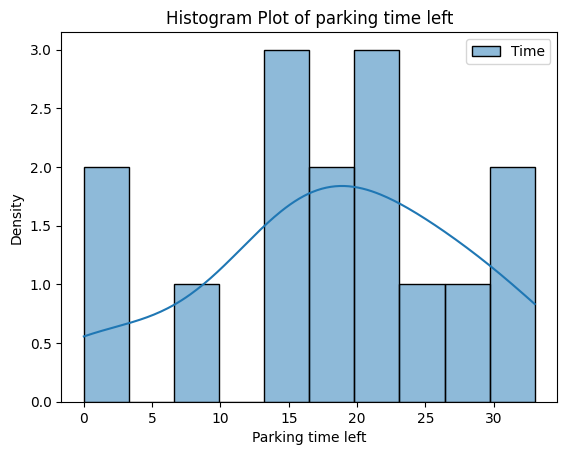

In [98]:
# Optional: Visualize the distribution
# Create a histogram plot with Seaborn
sns.histplot(parking, bins=10, kde=True, color='g')

# Add labels and title
plt.xlabel('Parking time left')
plt.ylabel('Density')
plt.title('Histogram Plot of parking time left')

# Show the plot
plt.show()

##**Assignment 12.24 in the book on page 336** <br>

Part of a university professor's job is to publish his or her research. This task often entails reading a variety of journal articles to keep up to date. To help determine faculty standards, a dean of a business schol surveyed a random sample of 12 professors across the country and asked them to count the number of journal articles they read in a typical month. Estimate with 90% confidence the mean number of journal articles read monthly by professors.<br>

Link to data: <br>
https://github.com/saoter/AQM2023/raw/main/Workshop%203/data/Xr12-24.xlsx

In [99]:
# Load in your data
file_path = 'https://github.com/saoter/AQM2023/raw/main/Workshop%203/data/Xr12-24.xlsx'
journals = pd.read_excel(file_path)

In [100]:
journals

,Articles
0,9
1,17
2,4
3,23
4,56
5,30
6,41
7,45
8,21
9,10


In [101]:
# Calculate the mean
mean_journals = np.mean(journals)
# Calcute the standard error of the mean (SEM)
sem_journals = stats.sem(journals)

/usr/local/lib/python3.10/dist-packages/numpy/core/fromnumeric.py:3430: FutureWarning: In a future version, DataFrame.mean(axis=None) will return a scalar mean over the entire DataFrame. To retain the old behavior, use 'frame.mean(axis=0)' or just 'frame.mean()'
  return mean(axis=axis, dtype=dtype, out=out, **kwargs)


In [102]:
# Calculate the degrees of freedom
degrees_of_freedom_journals = len(journals) - 1

In [103]:
# Set the confidence level
confidence_level_journals = 0.90

In [104]:
# Calculate the confidence interval
conf_interval_journals = stats.t.interval(
    confidence_level_journals,
    df=degrees_of_freedom_journals,
    loc=mean_journals,
    scale=sem_journals
    )

In [105]:
# Print the results
print(f"90% Confidence Interval is between {[conf_interval_journals[0][0], conf_interval_journals[1][0]]}")

90% Confidence Interval is between [18.104170490597784, 35.22916284273555]


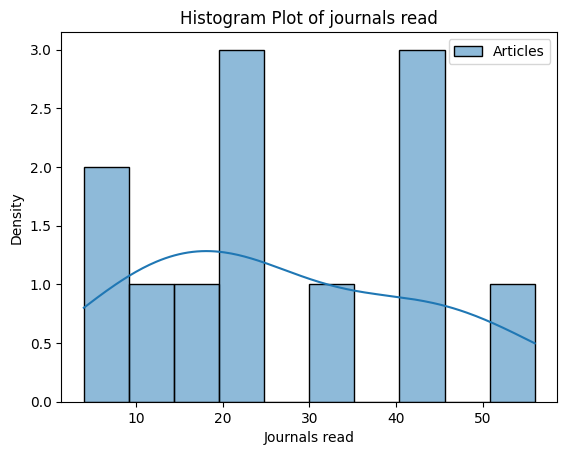

In [106]:
# Optional: Visualize the distribution
# Create a histogram plot with Seaborn
sns.histplot(journals, bins=10, kde=True, color='g')

# Add labels and title
plt.xlabel('Journals read')
plt.ylabel('Density')
plt.title('Histogram Plot of journals read')

# Show the plot
plt.show()